# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load Data

In [2]:
main_gz_file_path = "data/GSE127969_counts_TPM_ALL.csv.gz"
label_gz_file_path = "data/GSE127969_sc_cell_info.txt.gz"

In [3]:
data = pd.read_csv(main_gz_file_path, compression='gzip',
                   error_bad_lines=False,sep="\t", encoding='ANSI')
data

,Symbol,X114_01_A01,X114_01_A02,X114_01_A03,X114_01_A04,X114_01_A05,X114_01_A06,X114_01_A07,X114_01_A08,X114_01_A09,...,X164_rest_02_H03,X164_rest_02_H04,X164_rest_02_H05,X164_rest_02_H06,X164_rest_02_H07,X164_rest_02_H08,X164_rest_02_H09,X164_rest_02_H10,X164_rest_02_H11,X164_rest_02_H12
0,A1BG,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0
1,A1BG-AS1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,4.689738,0.000000,0.000000,0.003355,0.0,0.0,0.00000,0.0
2,A1CF,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0
3,A2M,0.002168,0.0,0.015176,0.0,0.0,0.0,2.235233,5.054749,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0
4,A2M-AS1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58272,ZYG11B,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.002286,0.000000,0.002286,22.445217,0.000000,0.0,0.0,0.00000,0.0
58273,ZYX,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,4.686430,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0
58274,ZYXP1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0
58275,ZZEF1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0


In [4]:
data2 = pd.read_csv(label_gz_file_path, compression='gzip',
                  encoding='ANSI',sep="\t")
data2

,Cell,Twin,Case,Sample,index.sort,Clones
0,SCP.14_CD4_A01,SCP.14,HD,CSF,CD4,ND
1,SCP.14_CD4_A02,SCP.14,HD,CSF,CD4,ND
2,SCP.14_CD4_A03,SCP.14,HD,CSF,CD4,ND
3,SCP.14_CD4_A04,SCP.14,HD,CSF,CD4,ND
4,SCP.14_CD4_A05,SCP.14,HD,CSF,CD4,ND
...,...,...,...,...,...,...
3741,Encephalitis_03_H08,161,MS,CSF,CD4Tcell,1
3742,Encephalitis_03_H09,161,MS,CSF,CD4,ND
3743,Encephalitis_03_H10,161,MS,CSF,CD4,ND
3744,Encephalitis_03_H11,161,MS,CSF,CD4,ND


In [3]:
# data=pd.read_csv("/Users/vikramkumar/Downloads/GSE127969_counts_TPM_ALL.csv",sep="\t")

In [75]:
df_T=data.T

In [76]:
df = data.set_index(data.columns[0])
dft = df.T
dft = dft.set_index(dft.columns[0])
dft.head(2)

Symbol,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,A4GALT,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3
A1BG,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.002168,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000941,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.509866,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
new_header = df_T.iloc[0] #grab the first row for the header
df2 = df_T[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header

In [78]:
df3=df2.iloc[:,0:5000]

In [79]:
df3=df3.reset_index()

In [80]:
df3

Symbol,index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,CRIP3,CRIPT,CRISP1,CRISP2,CRISP3,CRISPLD1,CRISPLD2,CRK,CRKL,CRLF1
0,X114_01_A01,0,0,0,0.00216802,0,0,0,0,0,...,0,8.42006,0,0,0,0,0,0,0,0
1,X114_01_A02,0,0,0,0,0,0,0,0,2.50987,...,0,0.0027022,0,0,0,0,0,0,0,0
2,X114_01_A03,0,0,0,0.0151762,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,X114_01_A04,0,0,0,0,0,0,0,0,0,...,0,5.78541,0,0,0,0,0,0,0,0
4,X114_01_A05,0,0,0,0,0,0,0,0,0,...,0,0.0648528,0,0,0,0,0,0,0,0.14446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,X164_rest_02_H08,0,0.00335461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3725,X164_rest_02_H09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3726,X164_rest_02_H10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3727,X164_rest_02_H11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
l1=list(df3["index"])

In [17]:
# data1=pd.read_csv("C:/Users/tekna/Downloads/GSE127969_sc_cell_info_modified.csv")#,sep="\t")

In [82]:
data1


,Cell,Twin,Case,Sample,index.sort,Clones
0,SCP.14_CD4_A01,SCP.14,HD,CSF,CD4,ND
1,SCP.14_CD4_A02,SCP.14,HD,CSF,CD4,ND
2,SCP.14_CD4_A03,SCP.14,HD,CSF,CD4,ND
3,SCP.14_CD4_A04,SCP.14,HD,CSF,CD4,ND
4,SCP.14_CD4_A05,SCP.14,HD,CSF,CD4,ND
...,...,...,...,...,...,...
3723,Encephalitis_03_H08,161,MS,CSF,CD4Tcell,1
3724,Encephalitis_03_H09,161,MS,CSF,CD4,ND
3725,Encephalitis_03_H10,161,MS,CSF,CD4,ND
3726,Encephalitis_03_H11,161,MS,CSF,CD4,ND


#  Data Processing

In [83]:
l2=data1["Cell"]

In [84]:
l2

0            SCP.14_CD4_A01
1            SCP.14_CD4_A02
2            SCP.14_CD4_A03
3            SCP.14_CD4_A04
4            SCP.14_CD4_A05
               ...         
3723    Encephalitis_03_H08
3724    Encephalitis_03_H09
3725    Encephalitis_03_H10
3726    Encephalitis_03_H11
3727    Encephalitis_03_H12
Name: Cell, Length: 3728, dtype: object

No of Cells in TPM data is different from info data .Teken common cell in both data for Tsne plot

In [85]:
myset = set(mylist)

NameError: name 'mylist' is not defined

In [86]:
mysetintersection_set = set.intersection(set(l1), set(l2))

In [87]:
len(mysetintersection_set)

3728

In [88]:
info=data1.loc[data1['Cell'].isin(mysetintersection_set)]

In [89]:
info

,Cell,Twin,Case,Sample,index.sort,Clones
0,SCP.14_CD4_A01,SCP.14,HD,CSF,CD4,ND
1,SCP.14_CD4_A02,SCP.14,HD,CSF,CD4,ND
2,SCP.14_CD4_A03,SCP.14,HD,CSF,CD4,ND
3,SCP.14_CD4_A04,SCP.14,HD,CSF,CD4,ND
4,SCP.14_CD4_A05,SCP.14,HD,CSF,CD4,ND
...,...,...,...,...,...,...
3723,Encephalitis_03_H08,161,MS,CSF,CD4Tcell,1
3724,Encephalitis_03_H09,161,MS,CSF,CD4,ND
3725,Encephalitis_03_H10,161,MS,CSF,CD4,ND
3726,Encephalitis_03_H11,161,MS,CSF,CD4,ND


In [90]:
final_data=df3.loc[df3['index'].isin(mysetintersection_set)]

In [91]:
final_data

Symbol,index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,CRIP3,CRIPT,CRISP1,CRISP2,CRISP3,CRISPLD1,CRISPLD2,CRK,CRKL,CRLF1
0,X114_01_A01,0,0,0,0.00216802,0,0,0,0,0,...,0,8.42006,0,0,0,0,0,0,0,0
1,X114_01_A02,0,0,0,0,0,0,0,0,2.50987,...,0,0.0027022,0,0,0,0,0,0,0,0
2,X114_01_A03,0,0,0,0.0151762,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,X114_01_A04,0,0,0,0,0,0,0,0,0,...,0,5.78541,0,0,0,0,0,0,0,0
4,X114_01_A05,0,0,0,0,0,0,0,0,0,...,0,0.0648528,0,0,0,0,0,0,0,0.14446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,X164_rest_02_H08,0,0.00335461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3725,X164_rest_02_H09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3726,X164_rest_02_H10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3727,X164_rest_02_H11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X=final_data.iloc[:,1:]

In [93]:
X

Symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,CRIP3,CRIPT,CRISP1,CRISP2,CRISP3,CRISPLD1,CRISPLD2,CRK,CRKL,CRLF1
0,0,0,0,0.00216802,0,0,0,0,0,0,...,0,8.42006,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2.50987,0,...,0,0.0027022,0,0,0,0,0,0,0,0
2,0,0,0,0.0151762,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,5.78541,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0648528,0,0,0,0,0,0,0,0.14446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,0,0.00335461,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y=info["index.sort"]

# TSNE plot

In [95]:
X_em=TSNE(n_components=2,perplexity=30,n_iter=400).fit_transform(X)

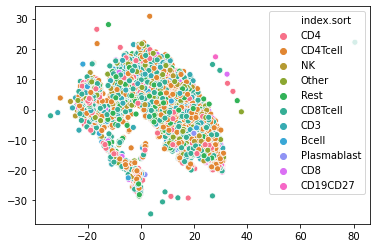

In [96]:
sns.scatterplot(X_em[:,0],X_em[:,1],hue=y)

#  Data scalling

In [97]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [98]:
scaled_data=scaler.transform(X)

In [108]:
%%time
X_em=TSNE(n_components=2,perplexity=30,n_iter=5000).fit_transform(scaled_data)

Wall time: 6min 33s


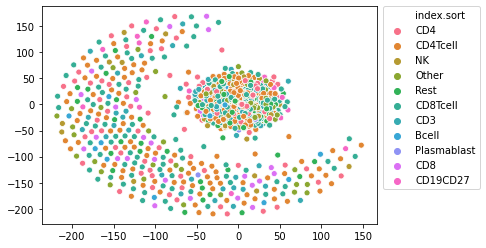

In [110]:
sns.scatterplot(X_em[:,0],X_em[:,1],hue=y)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
Norm=MinMaxScaler()
Norm.fit(X)

MinMaxScaler()

In [101]:
norm_data=Norm.transform(X)

In [102]:
X_em=TSNE(n_components=2,perplexity=30,n_iter=400).fit_transform(norm_data)

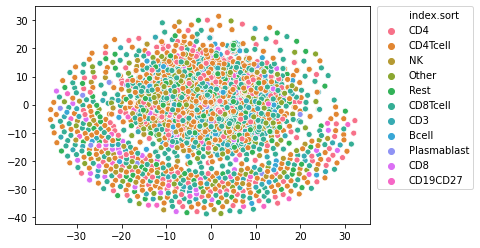

In [103]:
sns.scatterplot(X_em[:,0],X_em[:,1],hue=y)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)